<a href="https://colab.research.google.com/github/andrewwhite5/DS-Unit-2-Applied-Modeling/blob/master/module1/Applied_Modeling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

- Use classification metric: ROC AUC
- Visualize the ROC curve by plotting true positive rate vs false positive rate at varying thresholds

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

## Process for Data Science

#### Renee Teate, [Becoming a Data Scientist, PyData DC 2016 Talk](https://www.becomingadatascientist.com/2016/10/11/pydata-dc-2016-talk/)

![](https://image.slidesharecdn.com/becomingadatascientistadvice-pydatadc-shared-161012184823/95/becoming-a-data-scientist-advice-from-my-podcast-guests-55-638.jpg?cb=1476298295)

#### _This diagram is general and high-level. How do we apply it when doing predictive modeling with labeled, tabular data?_

Business Question ➡ Data Question = steps 1-3 below

Data Question ➡ Data Answer = steps 4-6 below

## Process for Supervised Learning

#### Francois Chollet, [Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/README.md), Chapter 4: Fundamentals of machine learning, "A universal workflow of machine learning"
 
> **1. Define the problem at hand and the data on which you’ll train.** Collect this data, or annotate it with labels if need be.

> **2. Choose how you’ll measure success on your problem.** Which metrics will you monitor on your validation data?

> **3. Determine your evaluation protocol:** hold-out validation? K-fold validation? Which portion of the data should you use for validation?

> **4. Develop a first model that does better than a basic baseline:** a model with statistical power.

> **5. Develop a model that overfits.** The universal tension in machine learning is between optimization and generalization; the ideal model is one that stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first you must cross it.

> **6. Regularize your model and tune its hyperparameters, based on performance on the validation data.** Repeatedly modify your model, train it, evaluate on your validation data (not the test data, at this point), modify it again, and repeat, until the model is as good as it can get. 

> **Iterate on feature engineering: add new features, or remove features that don’t seem to be informative.** Once you’ve developed a satisfactory model configuration, you can train your final production model on all the available data (training and validation) and evaluate it one last time on the test set.

## 1. Define the problem at hand and the data on which you'll train

This isn't easy! You have to define your target, join tables, and avoid leakage. This opinionated blog post explains:

#### [Data Science Is Not Taught At Universities - And Here Is Why](https://www.linkedin.com/pulse/data-science-taught-universities-here-why-maciej-wasiak/)

> The tables they use in machine learning research already have the target information clearly defined. Here comes the famous IRIS dataset, then the Wisconsin Breast Cancer, there is even Credit Risk or Telco Churn data and they all have the **Target** column there ...

> The problem is that in real life the **Target** flag is NEVER there.

> For churn modelling you may have many churn types on the system and need to distil the few that need modelling. And hey - when a subscriber moves from Postpaid contract to Prepaid – is this a churn or not? (‘Yes’ – says the Postpaid Base Manager, ‘No’ says the CEO ). You have to make the call ...

> Your source will be a database with tens or hundreds of **tables**, millions of records, usually after 3 painful migrations with gaps in history, columns without descriptions ...

> Flooded by **leaks from the future**, ...a dozen of other traps ... And you need to disarm all of them, because even one left behind may result in a completely useless model. 

> These are the skills employers are looking for.

## Regression or Classification?

#### You can convert problems from regression to classification

1. UCI, [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/adult)

2. DS5 student Han Lee, [Bitcoin Price Prediction app](https://dry-shore-97069.herokuapp.com/about):

> We also cared a lot more about the direction of returns instead of magnitude of returns. A trade placed based on the prediction that the price to go up tomorrow will be fine if the magnitude is off but will be unprofitable if the direction is wrong. ... Yesterday's return is unsurprising a great predictor for today's return, but has a poor directional accuracy.

#### You can convert problems from classification to regression

Brandon Rohrer, [What questions can machine learning answer](https://brohrer.github.io/five_questions_data_science_answers.html)

> Sometimes questions that look like multi-value classification questions are actually better suited to regression. For instance, “Which news story is the most interesting to this reader?” appears to ask for a category—a single item from the list of news stories. However, you can reformulate it to “How interesting is each story on this list to this reader?” and give each article a numerical score. Then it is a simple thing to identify the highest-scoring article. Questions of this type often occur as rankings or comparisons.

> “Which van in my fleet needs servicing the most?” can be rephrased as “How badly does each van in my fleet need servicing?” 
“Which 5% of my customers will leave my business for a competitor in the next year?” can be rephrased as “How likely is each of my customers to leave my business for a competitor in the next year?” 

> Binary classification problems can also be reformulated as regression. (In fact, under the hood some algorithms reformulate every binary classification as regression.) This is especially helpful when an example can belong part A and part B, or have a chance of going either way. When an answer can be partly yes and no, probably on but possibly off, then regression can reflect that. Questions of this type often begin “How likely…” or “What fraction…”

> How likely is this user to click on my ad? What fraction of pulls on this slot machine result in payout? How likely is this employee to be an insider security threat? What fraction of today’s flights will depart on time?

We'll see examples of this, using predicted probabilities instead of discrete predictions, with Tanzania Waterpumps and Lending Club data.

#### You can convert multi-class classification to binary classification

By omitting or combining some classes. We'll also see examples of this, with Tanzania Waterpumps and Lending Club data.

## Lending Club example 🏦

### Background

[According to Wikipedia,](https://en.wikipedia.org/wiki/Lending_Club)

> Lending Club is the world's largest peer-to-peer lending platform. Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

[Lending Club says,](https://www.lendingclub.com/) "Our mission is to transform the banking system to make credit more affordable and investing more rewarding." You can view their [loan statistics and visualizations](https://www.lendingclub.com/info/demand-and-credit-profile.action).

Lending Club's [Investor Education Center](https://www.lendingclub.com/investing/investor-education) can help you grow your domain expertise. The article about [Benefits of diversification](https://www.lendingclub.com/investing/investor-education/benefits-of-diversification) explains,

> With the investment minimum of \$1,000, you can get up to 40 Notes at \$25 each.

![](https://i.ibb.co/B37q8LB/www-lendingclub-com-browse-browse-action-1.png)

### Data sources
- [Current loans](https://www.lendingclub.com/browse/browse.action)
- [Data Dictionary & Historical loans](https://www.lendingclub.com/info/download-data.action) (17 zip files, 450 MB total)

### What questions could we ask with this data?
1. Can we predict the interest rate that Lending Club will assign to a loan, to reverse engineer their formula. (Regression problem. Can only use info from before the interest rate was assigned)
2. Can we predict whether a loan will be fully paid or charged off, to choose which loans to invest in. (Classification problem. Can only use info available at the time you choose loans, from loans that have been fully paid or charged off.)

[Here's a Plotly Dash app for #1](https://rrherr-project2-example.herokuapp.com/).

This notebook will work on #2.


### Use a subset of Loan Status

#### [Data-Driven Investment Strategies for Peer-to-Peer Lending: A Case Study for Teaching Data Science](https://www.liebertpub.com/doi/full/10.1089/big.2018.0092)

> Current refers to a loan that is still being reimbursed in a timely manner. Late corresponds to a loan on which a payment is between 16 and 120 days overdue. If the payment is delayed by more than 121 days, the loan is considered to be in Default. If LendingClub has decided that the loan will not be paid off, then it is given the status of Charged-Off.

> These dynamics imply that 5 months after the term of each loan has ended, every loan ends in one of two LendingClub states—fully paid or charged-off. We call these two statuses fully paid and defaulted, respectively, and we refer to a loan that has reached one of these statuses as expired.

> **One way to simplify the problem is to consider only loans that have expired at the time of analysis.**

> A significant portion (13.5%) of loans ended in Default status; depending on how much of the loan was paid back, these loans
might have resulted in a significant loss to investors who had invested in them. The remainder was Fully Paid—the borrower fully reimbursed the loan’s outstanding balance with interest, and the investor earned a positive return on his or her investment. Therefore, to avoid unsuccessful investments, our goal is to estimate which loans are more likely to default and which will yield low returns. 

### Use a subset of Loan Grade

[Lending Club announced,](https://blog.lendingclub.com/q1-2019-platform-update) 

> We periodically adjust platform products to reflect changes in investor demand and other marketplace factors. As a result, this quarter we are retiring Grade E loans. As of May 7, 2019, we will no longer facilitate new Grade E loans except for certain previously qualified or approved loans; **effective July 1, 2019, no grade E loans will be available on the platform.**

In [0]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

history_location = '../data/lending-club/lending-club-subset.csv'
current_location = '../data/lending-club/primaryMarketNotes_browseNotes_1-RETAIL.csv'

# Stratified sample, 10% of expired Lending Club loans, grades A-D
# Source: https://www.lendingclub.com/info/download-data.action
history = pd.read_csv(history_location)
history['issue_d'] = pd.to_datetime(history['issue_d'], infer_datetime_format=True)

# Current loans available for manual investing, June 17, 2019
# Source: https://www.lendingclub.com/browse/browse.action
current = pd.read_csv(current_location)

### Wrangle data
- Engineer date-based features
- Remove features to avoid leakage
- Do 3-way split, train/validate/test

In [0]:
# Engineer date-based features

# Transform earliest_cr_line to an integer:
# How many days the earliest credit line was open, before the loan was issued.
# For current loans available for manual investing, assume the loan will be issued today.
history['earliest_cr_line'] = pd.to_datetime(history['earliest_cr_line'], infer_datetime_format=True)
history['earliest_cr_line'] = history['issue_d'] - history['earliest_cr_line']
history['earliest_cr_line'] = history['earliest_cr_line'].dt.days

current['earliest_cr_line'] = pd.to_datetime(current['earliest_cr_line'], infer_datetime_format=True)
current['earliest_cr_line'] = pd.Timestamp.today() - current['earliest_cr_line']
current['earliest_cr_line'] = current['earliest_cr_line'].dt.days

# Transform earliest_cr_line for the secondary applicant
history['sec_app_earliest_cr_line'] = pd.to_datetime(history['sec_app_earliest_cr_line'], infer_datetime_format=True, errors='coerce')
history['sec_app_earliest_cr_line'] = history['issue_d'] - history['sec_app_earliest_cr_line']
history['sec_app_earliest_cr_line'] = history['sec_app_earliest_cr_line'].dt.days

current['sec_app_earliest_cr_line'] = pd.to_datetime(current['sec_app_earliest_cr_line'], infer_datetime_format=True, errors='coerce')
current['sec_app_earliest_cr_line'] = pd.Timestamp.today() - current['sec_app_earliest_cr_line']
current['sec_app_earliest_cr_line'] = current['sec_app_earliest_cr_line'].dt.days

# Engineer features for issue date year & month
history['issue_d_year'] = history['issue_d'].dt.year
history['issue_d_month'] = history['issue_d'].dt.month

current['issue_d_year'] = pd.Timestamp.today().year
current['issue_d_month'] = pd.Timestamp.today().month

### Use a subset of features

What subset of features should we use, to avoid leakage?

In [38]:
# Use Python sets to compare the historical columns & current columns

common_columns = set(history.columns) & set(current.columns)
just_history = set(history.columns) - set(current.columns)
just_current = set(current.columns) - set(history.columns)

pd.DataFrame(just_history).head()

,0
0,hardship_last_payment_amount
1,orig_projected_additional_accrued_interest
2,hardship_payoff_balance_amount
3,total_rec_late_fee
4,verification_status


In [39]:
# Train on the historical data.
# For features, use only the common columns shared by the historical & current data.
# For the target, use `loan_status` ('Fully Paid' or 'Charged Off')

features = list(common_columns)
target = 'loan_status'
X = history[features]
y = history[target]

features

['mo_sin_old_rev_tl_op',
 'num_accts_ever_120_pd',
 'open_rv_24m',
 'sec_app_fico_range_low',
 'zip_code',
 'sec_app_mort_acc',
 'num_op_rev_tl',
 'initial_list_status',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_rev_tl_op',
 'desc',
 'int_rate',
 'annual_inc',
 'num_sats',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_bc_dlq',
 'inq_last_12m',
 'num_tl_op_past_12m',
 'sec_app_chargeoff_within_12_mths',
 'total_il_high_credit_limit',
 'tot_hi_cred_lim',
 'annual_inc_joint',
 'bc_open_to_buy',
 'mo_sin_rcnt_tl',
 'num_bc_sats',
 'num_rev_tl_bal_gt_0',
 'total_acc',
 'total_cu_tl',
 'sec_app_inq_last_6mths',
 'pub_rec',
 'open_rv_12m',
 'fico_range_high',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'num_actv_bc_tl',
 'open_il_12m',
 'sec_app_collections_12_mths_ex_med',
 'tax_liens',
 'inq_last_6mths',
 'num_tl_120dpd_2m',
 'mths_since_last_record',
 'il_util',
 'title',
 'num_bc_tl',
 'loan_amnt',
 'open_il_24m',
 'num_actv_rev_tl',
 'total_bal_il',
 'pub_rec_bankruptcies',
 'pct_t

In [40]:
# Do train/validate/test 3-way split

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=20000, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=20000, 
    stratify=y_trainval, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (88334, 108)
y_train shape (88334,)
X_val shape (20000, 108)
y_val shape (20000,)
X_test shape (20000, 108)
y_test shape (20000,)


## Understand why accuracy is a misleading metric when classes are imbalanced

### Get accuracy score for majority class baseline

In [0]:
pd.options.display.float_format = None

In [42]:
y_train.value_counts(normalize=True)

Fully Paid     0.824858
Charged Off    0.175142
Name: loan_status, dtype: float64

In [43]:
import numpy as np
from sklearn.metrics import accuracy_score
majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.82485

### Get confusion matrix for majority class baseline

In [0]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

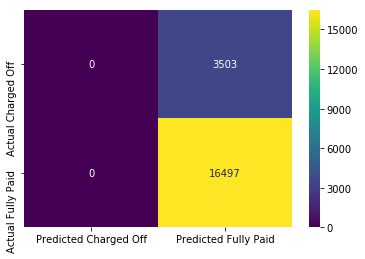

In [45]:
plot_confusion_matrix(y_val, y_pred);

### Get precision & recall for majority class baseline

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

 Charged Off       0.00      0.00      0.00      3503
  Fully Paid       0.82      1.00      0.90     16497

    accuracy                           0.82     20000
   macro avg       0.41      0.50      0.45     20000
weighted avg       0.68      0.82      0.75     20000



### Get ROC AUC score for majority class baseline
[sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [47]:
from sklearn.metrics import roc_auc_score

# What if we predicted 100% probability of the positive class for every prediction?
# This is like the majority class baseline, but with predicted probabilities,
# instead of just discrete classes.
# VERY IMPORTANT — Use predicted probabilities with ROC AUC score!
# Because, it's a metric of how well you rank/sort predicted probabilities.
y_pred_proba = np.full_like(y_val, fill_value=1.00)
roc_auc_score(y_val, y_pred_proba)

0.5

In [48]:
# ROC AUC is 0.50 by definition when predicting any constant probability value
y_pred_proba = np.full_like(y_val, fill_value=0)
roc_auc_score(y_val, y_pred_proba)

0.5

In [49]:
y_pred_proba = np.full_like(y_val, fill_value=0.50)
roc_auc_score(y_val, y_pred_proba)

0.5

In [50]:
y_val.value_counts()

Fully Paid     16497
Charged Off     3503
Name: loan_status, dtype: int64

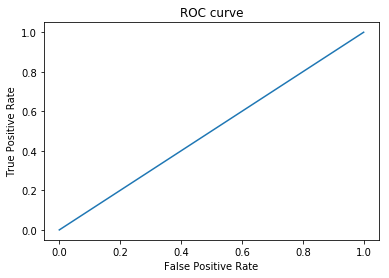

In [51]:
# Plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val=='Charged Off', y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

### Fit a model

#### Count missing values

In [52]:
null_counts = X_train.isnull().sum().sort_values(ascending=False)
null_counts.reset_index()

,index,0
0,member_id,88334
1,sec_app_mths_since_last_major_derog,87855
2,sec_app_revol_util,86968
3,sec_app_open_act_il,86954
4,sec_app_earliest_cr_line,86954
5,sec_app_collections_12_mths_ex_med,86954
6,sec_app_inq_last_6mths,86954
7,sec_app_open_acc,86954
8,sec_app_chargeoff_within_12_mths,86954
9,sec_app_fico_range_high,86954


In [53]:
many_nulls = null_counts[:73].index
print(list(many_nulls))

['member_id', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_earliest_cr_line', 'sec_app_collections_12_mths_ex_med', 'sec_app_inq_last_6mths', 'sec_app_open_acc', 'sec_app_chargeoff_within_12_mths', 'sec_app_fico_range_high', 'sec_app_mort_acc', 'sec_app_fico_range_low', 'revol_bal_joint', 'sec_app_num_rev_accts', 'annual_inc_joint', 'dti_joint', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'il_util', 'mths_since_rcnt_il', 'open_il_24m', 'open_acc_6m', 'total_bal_il', 'total_cu_tl', 'all_util', 'open_il_12m', 'open_rv_12m', 'open_act_il', 'inq_last_12m', 'inq_fi', 'open_rv_24m', 'max_bal_bc', 'mths_since_last_delinq', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'emp_title', 'emp_length', 'pct_tl_nvr_dlq', 'avg_cur_bal', 'num_actv_bc_tl', 'num_bc_tl', 'total_rev_hi_lim', 'tot_coll_amt', 'num_tl_30dpd', 'num_il_tl', 'tot_cur_bal', 'num_ac

#### Wrangle data

In [0]:
def wrangle(X):
    X = X.copy()

    # Engineer new feature for every feature: is the feature null?
    for col in X:
        X[col+'_NULL'] = X[col].isnull()
    
    # Convert percentages from strings to floats
    X['int_rate'] = X['int_rate'].str.strip('%').astype(float)
    X['revol_util'] = X['revol_util'].str.strip('%').astype(float)
    
    # Convert employment length from string to float
    X['emp_length'] = X['emp_length'].str.replace(r'\D','').astype(float)
        
    # Create features for three employee titles: teacher, manager, owner
    X['emp_title'] = X['emp_title'].str.lower()
    X['emp_title_teacher'] = X['emp_title'].str.contains('teacher', na=False)
    X['emp_title_manager'] = X['emp_title'].str.contains('manager', na=False)
    X['emp_title_owner']   = X['emp_title'].str.contains('owner', na=False)

    # Get length of free text fields
    X['title'] = X['title'].str.len()
    X['desc'] = X['desc'].str.len()
    X['emp_title'] = X['emp_title'].str.len()
    
    # Convert sub_grade from string "A1"-"D5" to integer 1-20
    sub_grade_ranks = {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'B1': 6, 'B2': 7, 
                       'B3': 8, 'B4': 9, 'B5': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 
                       'C5': 15, 'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20}
    X['sub_grade'] = X['sub_grade'].map(sub_grade_ranks)
    
    # Drop some columns
    X = X.drop(columns='id')        # Always unique
    X = X.drop(columns='url')       # Always unique
    X = X.drop(columns='member_id') # Always null
    X = X.drop(columns='grade')     # Duplicative of sub_grade
    X = X.drop(columns='zip_code')  # High cardinality
    
    # Only use these features which had nonzero permutation importances in earlier models    
    features = ['acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
                'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
                'collections_12_mths_ex_med', 'delinq_amnt', 'desc_NULL', 'dti', 
                'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_length_NULL', 
                'emp_title', 'emp_title_NULL', 'emp_title_owner', 'fico_range_high', 
                'funded_amnt', 'home_ownership', 'inq_last_12m', 'inq_last_6mths', 
                'installment', 'int_rate', 'issue_d_month', 'issue_d_year', 'loan_amnt', 
                'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
                'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'mths_since_last_major_derog_NULL', 
                'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_inq', 
                'num_actv_bc_tl', 'num_actv_rev_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 
                'num_tl_120dpd_2m_NULL', 'open_rv_12m_NULL', 'open_rv_24m', 
                'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'purpose', 
                'revol_bal', 'revol_bal_joint', 'sec_app_earliest_cr_line', 
                'sec_app_fico_range_high', 'sec_app_open_acc', 'sec_app_open_act_il', 
                'sub_grade', 'term', 'title', 'title_NULL', 'tot_coll_amt', 
                'tot_hi_cred_lim', 'total_acc', 'total_bal_il', 'total_bc_limit', 
                'total_cu_tl', 'total_rev_hi_lim']    
    X = X[features]
    
    # Return the wrangled dataframe
    return X


X_train = wrangle(X_train)
X_val   = wrangle(X_val)
X_test  = wrangle(X_test)

In [55]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

CPU times: user 1min 2s, sys: 247 ms, total: 1min 3s
Wall time: 33 s


### Get accuracy score for model

In [56]:
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.82555

### Get confusion matrix for model

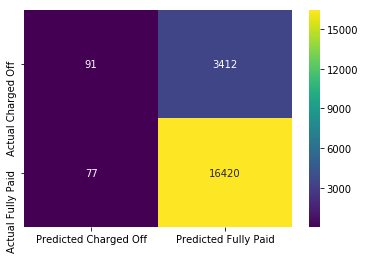

In [57]:
plot_confusion_matrix(y_val, y_pred);

### Get precision & recall for model

In [58]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.54      0.03      0.05      3503
  Fully Paid       0.83      1.00      0.90     16497

    accuracy                           0.83     20000
   macro avg       0.68      0.51      0.48     20000
weighted avg       0.78      0.83      0.75     20000



### Get ROC AUC score for model

In [59]:
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_proba)

0.692567006404386

## Understand ROC AUC (Receiver Operating Characteristic, Area Under the Curve)

#### Scikit-Learn docs
- [User Guide: Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

#### More links
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

[Wikipedia explains,](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) "A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings."

ROC AUC is the area under the ROC curve. [It can be interpreted](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) as "the expectation that a uniformly drawn random positive is ranked before a uniformly drawn random negative." 

ROC AUC measures how well a classifier ranks predicted probabilities. It ranges from 0 to 1. A naive majority class baseline will have an ROC AUC score of 0.5. 

## Visualize the ROC curve by plotting true positive rate vs false positive rate at varying thresholds

In [60]:
from ipywidgets import interact, fixed
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.multiclass import unique_labels

def set_threshold(y_true, y_pred_proba, threshold=0.5):
    """
    For binary classification problems. 
    y_pred_proba : predicted probability of class 1
    """
    
    # Apply threshold to predicted probabilities
    # to get discrete predictions
    class_0, class_1 = unique_labels(y_true)
    y_pred = np.full_like(y_true, fill_value=class_0)
    y_pred[y_pred_proba > threshold] = class_1
    
    # Plot distribution of predicted probabilities
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.title('Distribution of predicted probabilities')
    plt.show()

    # Calculate true positive rate and false positive rate
    true_positives = (y_pred==y_true) & (y_pred==class_1)
    false_positives = (y_pred!=y_true) & (y_pred==class_1)
    actual_positives = (y_true==class_1)
    actual_negatives = (y_true==class_0)
    true_positive_rate = true_positives.sum() / actual_positives.sum()
    false_positive_rate = false_positives.sum() / actual_negatives.sum()
    print('False Positive Rate', false_positive_rate)
    print('True Positive Rate', true_positive_rate)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Plot point on ROC curve for the current threshold
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()
    
    # Show ROC AUC score
    print('Area under the Receiver Operating Characteristic curve:', 
          roc_auc_score(y_true, y_pred_proba))
    
    # Show confusion matrix & classification report
    plot_confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))

interact(set_threshold, 
         y_true=fixed(y_val), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.05));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

### BONUS: Use the class_weight parameter in scikit-learn

Here's a fun demo you can explore! The next code cells do five things:

#### 1. Generate data

We use scikit-learn's [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to generate fake data for a binary classification problem, based on several parameters, including:
- Number of samples
- Weights, meaning "the proportions of samples assigned to each class."
- Class separation: "Larger values spread out the clusters/classes and make the classification task easier."

(We are generating fake data so it is easy to visualize.)

#### 2. Split data

We split the data three ways, into train, validation, and test sets. (For this toy example, it's not really necessary to do a three-way split. A two-way split, or even no split, would be ok. But I'm trying to demonstrate good habits, even in toy examples, to avoid confusion.)

#### 3. Fit model

We use scikit-learn to fit a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the training data.

We use this model parameter:

> **class_weight : _dict or ‘balanced’, default: None_**

> Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.

> The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.


#### 4. Evaluate model

We use our Logistic Regression model, which was fit on the training data, to generate predictions for the validation data.

Then we print [scikit-learn's Classification Report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report), with many metrics, and also the accuracy score. We are comparing the correct labels to the Logistic Regression's predicted labels, for the validation set. 

#### 5. Visualize decision function

Based on these examples
- https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#example-1-decision-regions-in-2d

In [0]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

              precision    recall  f1-score   support

           0       1.00      0.15      0.25        96
           1       0.05      1.00      0.09         4

    accuracy                           0.18       100
   macro avg       0.52      0.57      0.17       100
weighted avg       0.96      0.18      0.25       100



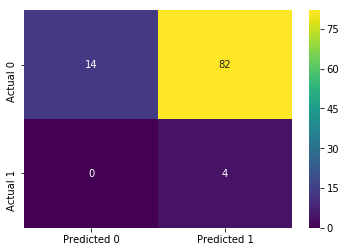

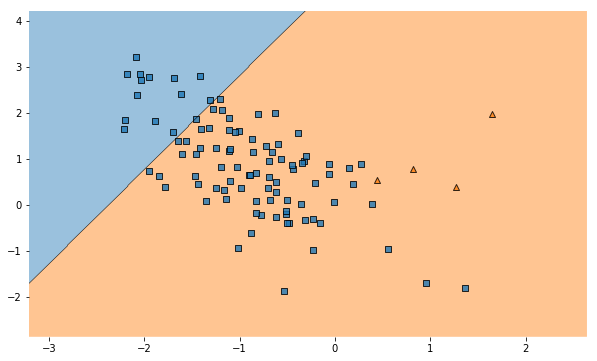

In [62]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#1. Generate data

# Try re-running the cell with different values for these parameters
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1, weights=weights, 
                           class_sep=class_sep, random_state=0)


# 2. Split data

# Uses our custom train_validation_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)


# 3. Fit model

# Try re-running the cell with different values for this parameter
class_weight = {0: 1, 1: 10000}

model = LogisticRegression(solver='lbfgs', class_weight=class_weight)
model.fit(X_train, y_train)


# 4. Evaluate model

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
plot_confusion_matrix(y_val, y_pred)

# 5. Visualize decision regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_val, y_val, model, legend=0);

Try re-running the cell above with different values for these four parameters:
- `n_samples`
- `weights`
- `class_sep`
- `class_balance`

For example, with a 50% / 50% class distribution:
```
n_samples = 1000
weights = (0.50, 0.50)
class_sep = 0.8
class_balance = None
```

With a 95% / 5% class distribution:
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = None
```

With the same 95% / 5% class distribution, but changing the Logistic Regression's `class_balance` parameter to `'balanced'` (instead of its default `None`)
```
n_samples = 1000
weights = (0.95, 0.05)
class_sep = 0.8
class_balance = 'balanced'
```

With the same 95% / 5% class distribution, but with different values for `class_balance`:
- `{0: 1, 1: 1}` _(equivalent to `None`)_
- `{0: 1, 1: 2}`
- `{0: 1, 1: 10}` _(roughly equivalent to `'balanced'` for this dataset)_
- `{0: 1, 1: 100}`
- `{0: 1, 1: 10000}`

How do the evaluation metrics and decision region plots change?

## What you can do about imbalanced classes

[Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/) gives "a rough outline of useful approaches" : 

- Do nothing. Sometimes you get lucky and nothing needs to be done. You can train on the so-called natural (or stratified) distribution and sometimes it works without need for modification.
- Balance the training set in some way:
  - Oversample the minority class.
  - Undersample the majority class.
  - Synthesize new minority classes.
- Throw away minority examples and switch to an anomaly detection framework.
- At the algorithm level, or after it:
  - Adjust the class weight (misclassification costs).
  - Adjust the decision threshold.
  - Modify an existing algorithm to be more sensitive to rare classes.
- Construct an entirely new algorithm to perform well on imbalanced data.

#### We demonstrated two of these options: 

- "Adjust the class weight (misclassification costs)" — many scikit-learn classifiers have a `class_balance` parameter
- "Adjust the decision threshold" — you can lean more about this in a great blog post, [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415).

#### Another option to be aware of:
- The [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library can be used to "oversample the minority class, undersample the majority class, or synthesize new minority classes."

-----------------------

---------------------------

# Assignment

**You will use your portfolio project dataset for all assignments this sprint.**

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading

### ROC AUC
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)

### Imbalanced Classes
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)

### Last lesson
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), by Lambda DS3 student Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)